In [1]:
# # 查看 GPU 加速计算支持 
# # Check GPU for accelerate
# import torch

# # 检查是否安装了GPU支持 
# # Check if support GPU
# if torch.cuda.is_available():
#     print("CUDA is available. GPU device(s) detected.")
#     print(f"Number of GPU devices: {torch.cuda.device_count()}")
    
#     # 获取每个GPU的名称 
#     # Get each name of the GPU device
#     for i in range(torch.cuda.device_count()):
#         print(f"Device {i}: {torch.cuda.get_device_name(i)}")
# else:
#     print("CUDA is not available. No GPU detected.")

## **训练 Traning**

In [ ]:
# run_sb3.py  简化
from tools.train import QuadrupedTrainer

train = QuadrupedTrainer(algorithm="SAC", 
                         num_envs=1,       # num_envs
                         load_nn=False)    
train.set_env_config(motor_control_mode    ="CPG", 
                    task_env               ="FWD_LOCOMOTION", 
                    observation_space_mode ="LR_COURSE_OBS",
                    )
train.train(total_timesteps=1000000)
train.save_model()


## **测试 Simulation Test**

In [ ]:
# Implemented observation spaces for deep reinforcement learning: 
#   "DEFAULT":    motor angles and velocities, body orientation
#   "LR_COURSE_OBS":  [#0000FF TODO: what should you include? what is reasonable to measure on the real system? CPG states?] 

# Tasks to be learned with reinforcement learning
#     - "FWD_LOCOMOTION"
#         reward forward progress only
#     - "FLAGRUN"
#         move to goal, once reached, a new goal is randomly selected.
#     - "LR_COURSE_TASK" 
#         [#0000FF TODO: what should you train for?]
#         Ideally we want to command A1 to run in any direction while expending minimal energy
#         How will you construct your reward function? 

# Motor control modes:
#   - "TORQUE": 
#         supply raw torques to each motor (12)
#   - "PD": 
#         supply desired joint positions to each motor (12)
#         torques are computed based on the joint position/velocity error
#   - "CARTESIAN_PD": 
#         supply desired foot positions for each leg (12)
#         torques are computed based on the foot position/velocity error
#   - "CPG": 
#         supply desired CPG state modulations (8), mapped to foot positions
#         torques are computed based on inverse kinematics + joint PD (or you can add Cartesian PD)

# Terrain types:
#   -  None
#   - "SLOPES":
#   - "STAIRS":
#   - "GAPS":
#   - "RANDOM":

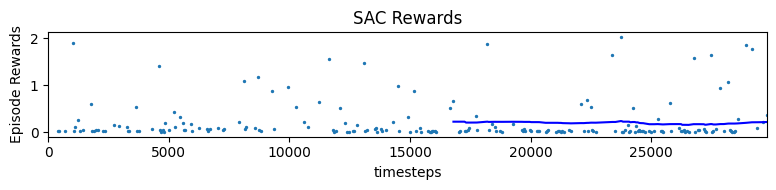

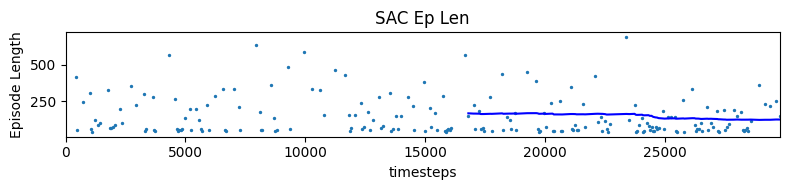

c:\Users\MATH-286-Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\MATH-286-Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(



Loaded model: ./logs/intermediate_models/112624155608\rl_model_30000_steps.zip

Episode reward: [0]
Final base position: (-0.22721541385999502, 0.05330971695588104, 0.32660752967823997)
Episode reward: [0]
Final base position: (0.01422085830249247, -0.1138030458083137, 0.3612046790560149)
Episode reward: [0]
Final base position: (0.034066653731805806, 0.3776901389733139, 0.28419873534507484)


error: Not connected to physics server.

In [ ]:
# load_sb3.py 简化
from tools.test import QuadrupedSimulation

# 配置 Settings
test = QuadrupedSimulation(algorithm="SAC", 
                           log_dir="./logs/intermediate_models/112624155608")

test.set_env_config(render=True, 
                    record_video=False, 
                    add_noise=False,
                    motor_control_mode="CPG", 
                    task_env="FWD_LOCOMOTION", 
                    observation_space_mode="LR_COURSE_OBS")

test.load_plots()        # plot rewards
test.load_and_run()      # run simulation
